In [174]:
import sklearn                  # pip install scikit-learn 
from sklearn import datasets 

digits = datasets.load_digits()

In [175]:
print(digits.data.shape)

print(digits.target.shape)  # Há uma amostra de 1.797 observações => Imagens de dígitos ... 

(1797, 64)
(1797,)


In [176]:
print(type(digits.data[128]))   # Temos números que vão do zero ao dezesseis => Representam uma cor na escala de cinza ...  

<class 'numpy.ndarray'>


In [177]:
# Agora realize uma consulta com o comando "digits" no lugar de "data" ... 

print(digits.images[0]) # Uma divisão de 8 por 8 => Imagine que o zero seja o "branco" e o 16 o "preto"

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


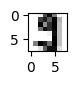

In [178]:
import matplotlib.pyplot as plt 

%matplotlib inline 

plt.figure(figsize=(0.5, 0.5))
plt.imshow(digits.images[128], cmap=plt.cm.gray_r)

In [179]:
# Algoritmo SVM => Support Vector Machine 

from sklearn.model_selection import train_test_split

x = digits.data
y = digits.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=5)

In [180]:
from sklearn import svm 
from sklearn import metrics

classifier = svm.SVC()

classifier.fit(x, y)

SVC()

In [181]:
# Leitura da imagem de um dígito 

import numpy as np 
from matplotlib import image as mpimg

img = mpimg.imread('number2.png') # Lendo a imagem "number.png"

# A leitura da imagem é efetuada por linha, de modo que temos os seus pixels ... 
def rgb2gray(rgb) -> None:
    img_array = np.dot(rgb[..., :3], [0.299, 0.587, 0.114])
    img_array = (16 - (img_array * 16)).astype(int) # Informações de zero ao 16 ... 
    img_array = img_array.flatten()
    return img_array  # Array de 64 elementos ... 

previsao = classifier.predict([rgb2gray(img)])

print('>>', format(previsao))

>> [8]


In [182]:
# Regressão logística 

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x, y) # No lugar de utilizar as variáveis de treino (x_train, y_train), utilize os dados completos ... 

previsoes_logreg = logreg.predict([rgb2gray(img)])

print('>>', format(previsoes_logreg)) # Precisão de 95% => O algorítmo reconheceu o dígito "8" da "number2.png"

>> [8]


c:\code7\digits_dataset\my-env\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
